In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
root = "/home/endtheme/git/bird-class/data/"
txt_path = os.path.join(root, "train.txt")

a = pd.read_csv(txt_path, sep=" ", names= ["path", "label"])
a

,path,label
0,Black_footed_Albatross_0004_2731401028.jpg,0
1,Black_footed_Albatross_0008_1384283201.jpg,0
2,Black_footed_Albatross_0011_820118444.jpg,0
3,Black_footed_Albatross_0003_2981373810.jpg,0
4,Black_footed_Albatross_0021_2443213385.jpg,0
...,...,...
4824,Common_Yellowthroat_0012_2573777857.jpg,199
4825,Common_Yellowthroat_0002_2679007659.jpg,199
4826,Common_Yellowthroat_0009_2099303008.jpg,199
4827,Common_Yellowthroat_0008_2691070273.jpg,199


In [4]:
root = "/home/endtheme/git/bird-class/data/"
txt_path = os.path.join(root, "train.txt")
labels = []
img_paths = []
with open(txt_path, 'r') as file:
    for line in file:
# Remove any trailing characters like newlines or spaces
        line = line.strip().split(" ")
        # print("img: ", line[0])
        # print("label: ", int(line[1])) 
        labels.append(int(line[1]))
        img_paths.append(line[0])
data = pd.DataFrame({"path":img_paths,"label":labels})
data

,path,label
0,Black_footed_Albatross_0004_2731401028.jpg,0
1,Black_footed_Albatross_0008_1384283201.jpg,0
2,Black_footed_Albatross_0011_820118444.jpg,0
3,Black_footed_Albatross_0003_2981373810.jpg,0
4,Black_footed_Albatross_0021_2443213385.jpg,0
...,...,...
4824,Common_Yellowthroat_0012_2573777857.jpg,199
4825,Common_Yellowthroat_0002_2679007659.jpg,199
4826,Common_Yellowthroat_0009_2099303008.jpg,199
4827,Common_Yellowthroat_0008_2691070273.jpg,199


<Axes: >

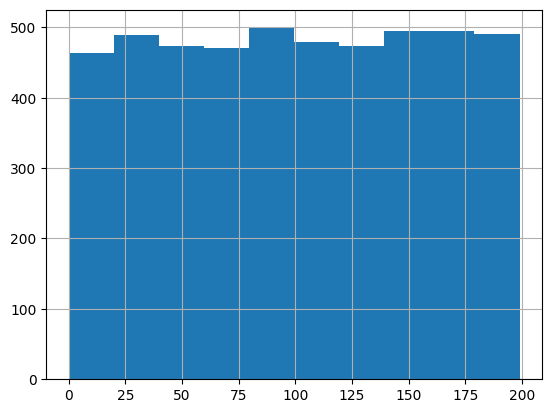

In [5]:
data.label.hist()

In [6]:
from utils.utils import get_dataloader
from torchvision import datasets, transforms
batch_size = 32
data_path = "/home/endtheme/git/bird-class/data/"
import torchvision.transforms as transform
from torchvision.transforms import v2
import torchvision
train_transformer = transform.Compose([
                           transform.ToTensor(),
                           transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                               (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
])


test_transformer = transform.Compose([
                           transform.Resize((256, 256)),
                           
                           transform.ToTensor(),
                           transform.Normalize((0.4124234616756439, 0.3674212694168091, 0.2578217089176178), 
                                               (0.3268945515155792, 0.29282665252685547, 0.29053378105163574))
])
shuffle = True
compact = False

train_loader,test_loader = get_dataloader(data_path = data_path, train_transform = train_transformer, test_transform = test_transformer, batch_size = batch_size, shuffle = shuffle, compact = compact)




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2616407..2.5005424].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2616407..2.0956082].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2616407..2.5005424].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2616407..2.4060576].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2616407..2.5410357].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2616407..2.5545337].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.261640

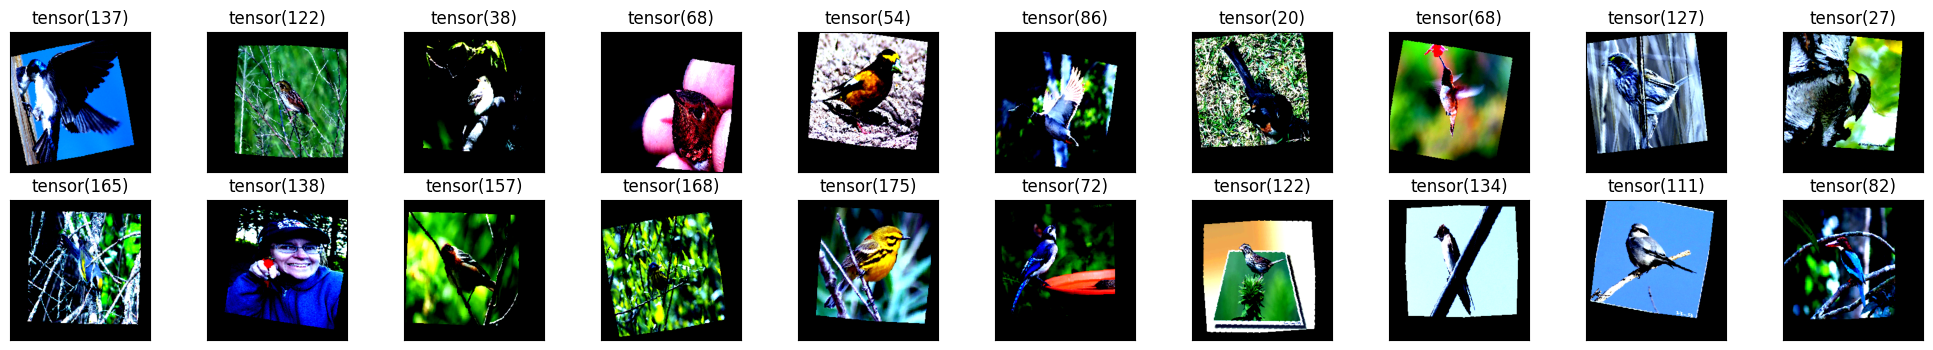

In [7]:
import numpy as np
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(labels[idx])

In [8]:
# import importlib
# importlib.reload(model)

In [9]:
x = [1,2,3]
y = [1,2,2]
(x==y)


False

In [10]:
# for (a,b) in train_loader:
#     print(b)
len(train_loader.dataset)

4829

In [11]:
from trainer import Trainer
from model.baseline import BirdClassifier
model = BirdClassifier()
trainer = Trainer(model,train_loader, test_loader)
trainer.train(epochs = 20)

/home/endtheme/miniconda3/envs/bird/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/endtheme/miniconda3/envs/bird/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  0%|          | 0/20 [00:00<?, ?it/s]


output:  tensor([[0.0045, 0.0053, 0.0041,  ..., 0.0039, 0.0050, 0.0048],
        [0.0048, 0.0052, 0.0052,  ..., 0.0050, 0.0053, 0.0040],
        [0.0057, 0.0046, 0.0047,  ..., 0.0042, 0.0057, 0.0046],
        ...,
        [0.0052, 0.0055, 0.0050,  ..., 0.0049, 0.0049, 0.0047],
        [0.0049, 0.0051, 0.0051,  ..., 0.0049, 0.0046, 0.0049],
        [0.0052, 0.0041, 0.0044,  ..., 0.0045, 0.0055, 0.0046]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)
predicted:  tensor([ 15, 193, 144,  51, 164,  79,  41, 119,  54, 191, 191,  54, 184, 113,
         95, 196,  67,  51, 148,  70, 135, 191, 119,  34, 177,  54,  76, 164,
        164,  95,  64, 172], device='cuda:0')
labels:  tensor([147, 103,  26, 108, 127,  49,  22,   7,  67, 132,  26,  90, 125,  70,
        180,  53, 147,  84,  50,  53, 132, 147, 122,   8, 165, 106, 178,  77,
         17,  19, 167,  76], device='cuda:0')
output:  tensor([[0.0049, 0.0018, 0.0037,  ..., 0.0069, 0.0027, 0.0017],
        [0.0043, 0.0033, 0.0058,  ..., 0.0

  0%|          | 0/20 [03:32<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
print(model)

BirdClassifier(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
     